<a href="https://colab.research.google.com/github/jcmachicao/MachineLearningAvanzado_UC_2025/blob/main/MonteCarlo__juego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [113]:
# --- Parámetros del entorno ---
GRID_SIZE = 24
N_BARRIERS = 4
reward_success = 5   # puedes cambiar a +3, +5, etc.
reward_fail = -1

In [114]:
#@title Crear tablero con barreras, inicio y meta
def create_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

    # Barreras (B = -1)
    barriers = set()
    while len(barriers) < N_BARRIERS:
        b = (np.random.randint(0, GRID_SIZE), np.random.randint(0, GRID_SIZE))
        barriers.add(b)
    for b in barriers:
        grid[b] = -1

    # Posición inicial (A) y salida (S) aleatorias que no estén en barreras
    empty_cells = [(i, j) for i in range(GRID_SIZE) for j in range(GRID_SIZE) if grid[i, j] == 0]
    start = random.choice(empty_cells)
    empty_cells.remove(start)
    candidates = [pos for pos in empty_cells if abs(pos[0]-start[0]) + abs(pos[1]-start[1]) >= 10]
    goal = random.choice(candidates) if candidates else random.choice(empty_cells)

    return grid, start, goal

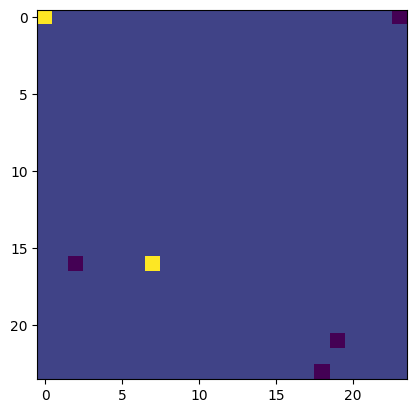

In [115]:
GRID, START, GOAL = create_grid()
GRID[START] = 4
GRID[GOAL] = 4
plt.imshow(GRID)

In [117]:
#@title Movimiento del agente
def step(state, goal, grid):
    i, j = state
    moves = [(0,1),(0,-1),(1,0),(-1,0)]
    random.shuffle(moves)
    for di, dj in moves:
        ni, nj = i+di, j+dj
        if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE:
            if grid[ni, nj] != -1:  # evitar barreras
                return (ni, nj)
    return state  # si está rodeado de barreras, se queda

# --- Generar un episodio completo ---
def generate_episode(start, goal, grid, max_steps=100):
    state = start
    trajectory = [state]

    for _ in range(max_steps):
        if state == goal:
            return trajectory, reward_success
        state = step(state, goal, grid)
        trajectory.append(state)

    return trajectory, reward_fail  # si no llega a la salida

# --- Actualizar valores después de un episodio ---
def update_values(values, trajectory, reward):
    for s in trajectory:
        values[s] += reward
    return values

# --- Monte Carlo ---
def monte_carlo(grid, start, goal, n_episodes=500):
    values = np.zeros_like(grid, dtype=float)
    counts = np.zeros_like(grid, dtype=int)

    for _ in range(n_episodes):
        trajectory, reward = generate_episode(start, goal, grid)
        values = update_values(values, trajectory, reward)
        for s in trajectory:
            counts[s] += 1

    # Promedio de retornos
    avg_values = np.divide(values, counts, out=np.zeros_like(values), where=counts!=0)
    return avg_values

# --- Visualización ---
def plot_values(values, grid, start, goal):
    plt.figure(figsize=(10,10))
    plt.imshow(values, cmap="RdYlGn", vmin=-1, vmax=1)

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if (i,j) == start:
                plt.text(j, i, "A", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
            elif (i,j) == goal:
                plt.text(j, i, "S", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
            elif grid[i,j] == -1:
                plt.text(j, i, "B", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
            else:
                plt.text(j, i, f"{values[i,j]:.1f}", ha="center", va="center", color="black", fontsize=8)

    plt.title("Monte Carlo estilo hoja de cálculo (8x8)")
    plt.colorbar(label="Valor Monte Carlo")
    plt.show()

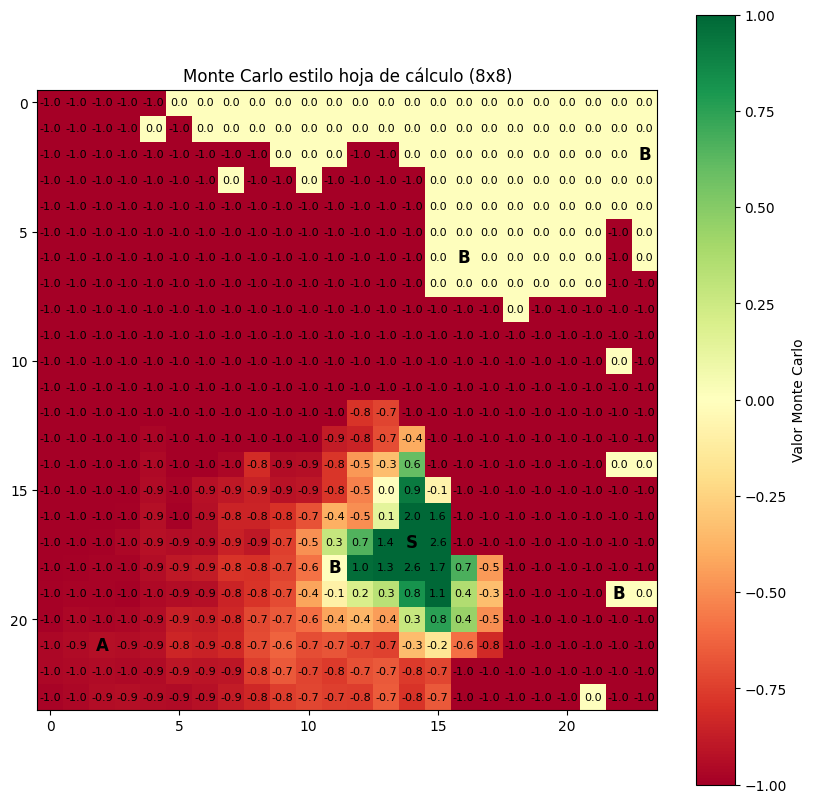

In [118]:
# --- Main ---
if __name__ == "__main__":
    GRID, START, GOAL = create_grid()
    values = monte_carlo(GRID, START, GOAL, n_episodes=1000)
    plot_values(values, GRID, START, GOAL)